## Tutorial - Run Code on Real Datasets (Lake Erie)

#### The Lake Erie Data can be found in the Sample_Input folder. This data is a result of VHIP being run on samples from Lake Erie. The samples were originally collected to study cyanobacterial harmful algae blooms in the water. Harmful algal blooms are the rapid growth of algae or cyanobacteria in water that can harm people, animals, or the environment. Cyanobacterial harmful algae blooms (cHABs) are specific to freshwater and are characterized by their blue-green appearance. The data from Lake Erie was collected by AJ Wing and the analysis was run by Eric Bastien and Evelyn Faust. VHIP 2.0 aims to predict which viruses interact which hosts. The output is this prediction data from the site at varying time points. Moving forward, we hope to get access to data for a longer span of time and run this analysis on each of those additional time points. This will allow us to address another question: "How do patterns in predicted virus-host interactions change over time?".


#### Load the packages

In [55]:
%reload_ext autoreload
%autoreload 2

In [56]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER
from VirusHostNetworkAnalysis.null_model import CM
from VirusHostNetworkAnalysis.visualize import Graph
from VirusHostNetworkAnalysis.prediction_matrix import Calculations

In [57]:
aug4 = PredictionMatrix("Sample_Input/Aug4_predictions.tsv")
sep29 = PredictionMatrix("Sample_Input/Sep29_predictions.tsv")

#### Plot the heatmaps for the data from August 4th and September 29th to compare how it changed during that period.

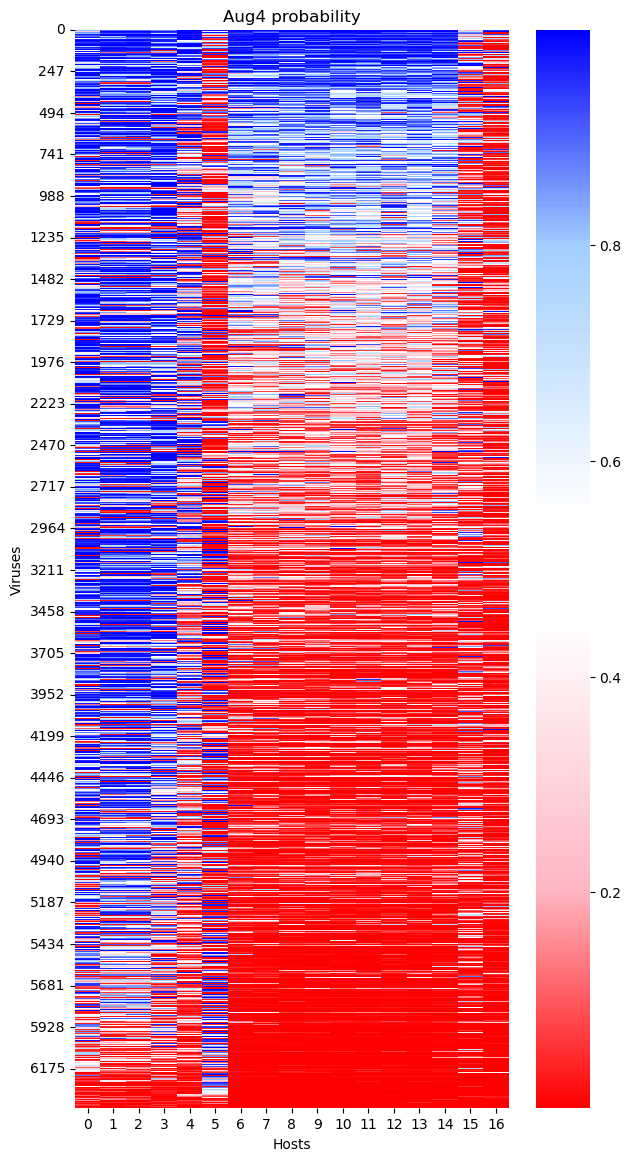

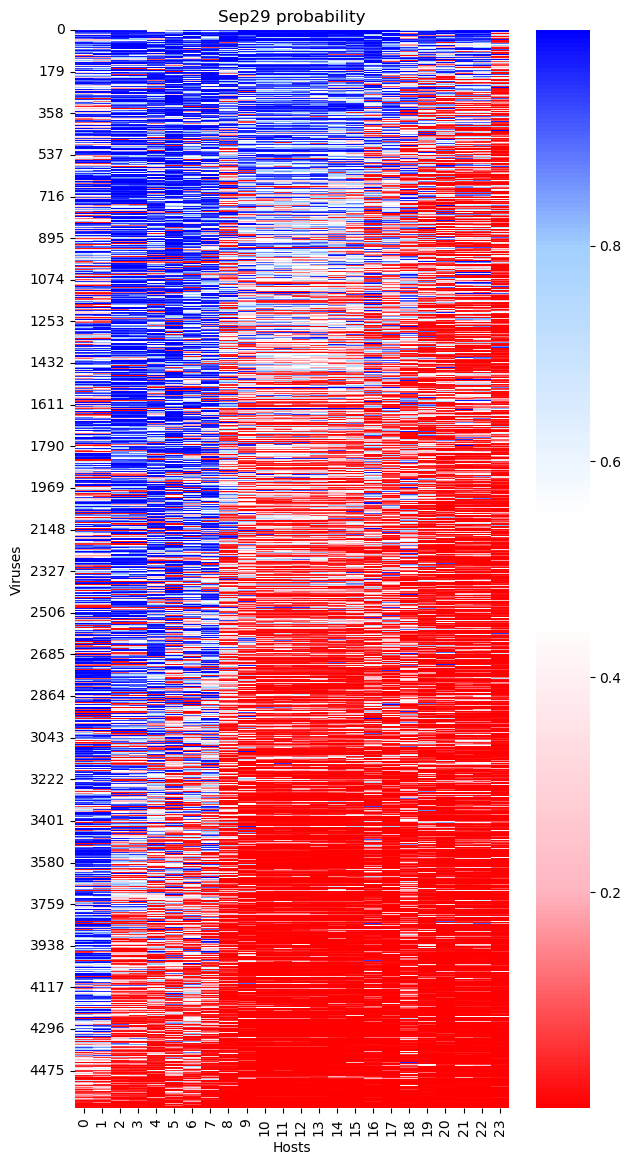

In [27]:
aug4.make_rectangular_matrix('probability')
aug4.plot_heatmap('probability')

sep29.make_rectangular_matrix('probability')
sep29.plot_heatmap('probability')

In [28]:
aug4.virus_host_array.shape

(6408, 17)

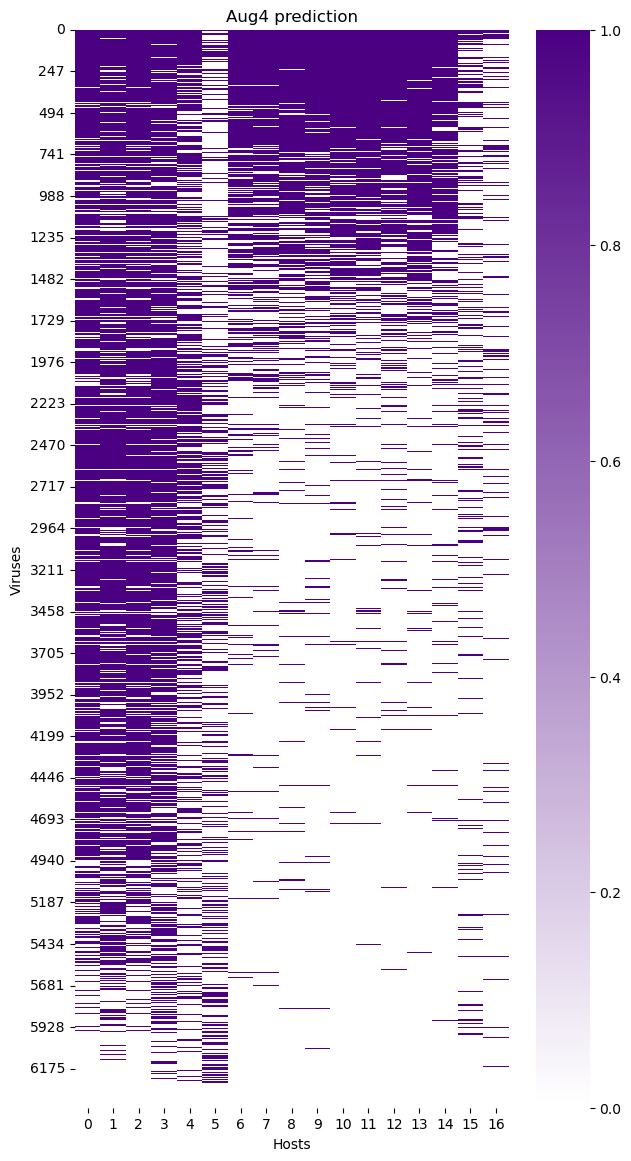

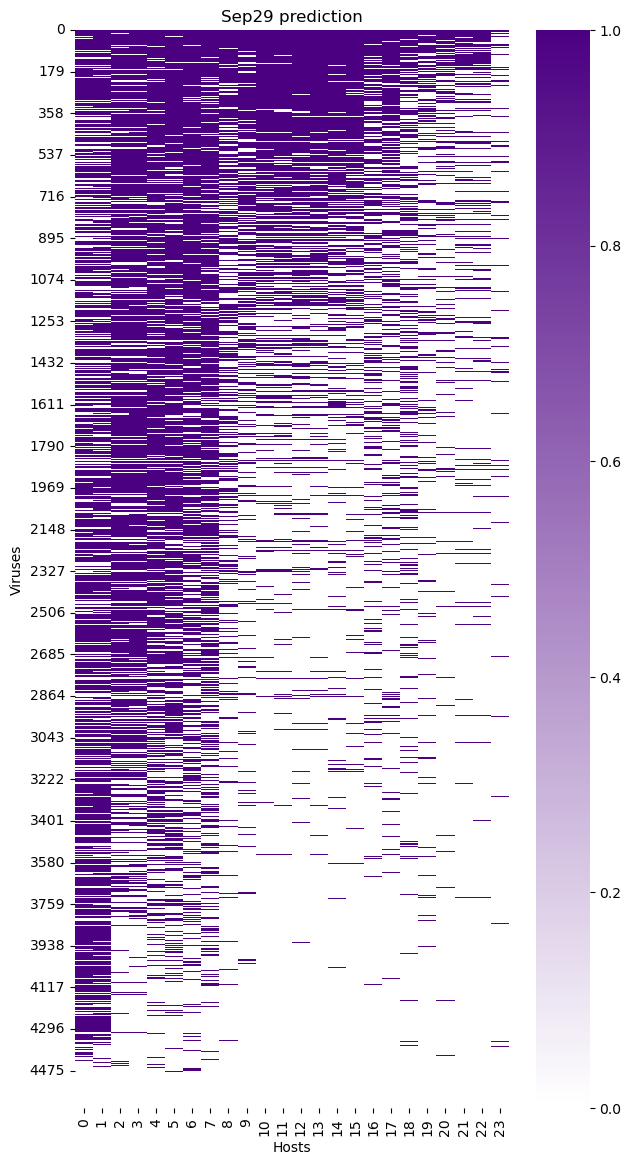

In [58]:
aug4.make_rectangular_matrix('prediction')
aug4.plot_heatmap('prediction')

sep29.make_rectangular_matrix('prediction')
sep29.plot_heatmap('prediction')


In [59]:
aug4.make_square_matrix('prediction')
sep29.make_square_matrix('prediction')

calc_aug4 = Calculations(aug4.virus_host_array_square)
calc_sep29 = Calculations(sep29.virus_host_array_square)

calc_aug4.calculate_modularity()
calc_sep29.calculate_modularity()

Modularity:  0.19372504046459824
Modularity:  0.1542619851083642


0.1542619851083642

In [60]:
import sys
sys.getsizeof(aug4.virus_host_array)

128

#### In the heatmaps above, there are some notable differences. First, the August data seems to have some modularity present (indicated by the gap at the top of column 5). This gap is not present in September. Instead, the September dataset appears to be mostly nested.

#### Make an edge list for each dataset.

In [ ]:
aug4_edges = aug4.create_edge_list()
sep29_edges = sep29.create_edge_list()

Edge list created with 39419 edges.
Edge list created with 38977 edges.


#### Next, we will make ER and configuration models for the August and September data. This will serve as null models that can be compared to our actual graphs. Pass in the length of the viruses as row number, length of hosts as column number, and any desired p cutoff value. We will use 0.5 because this is the cutoff used for the VHIP analysis. This data is too large to display graphs for, so instead we will show the degree distributions.

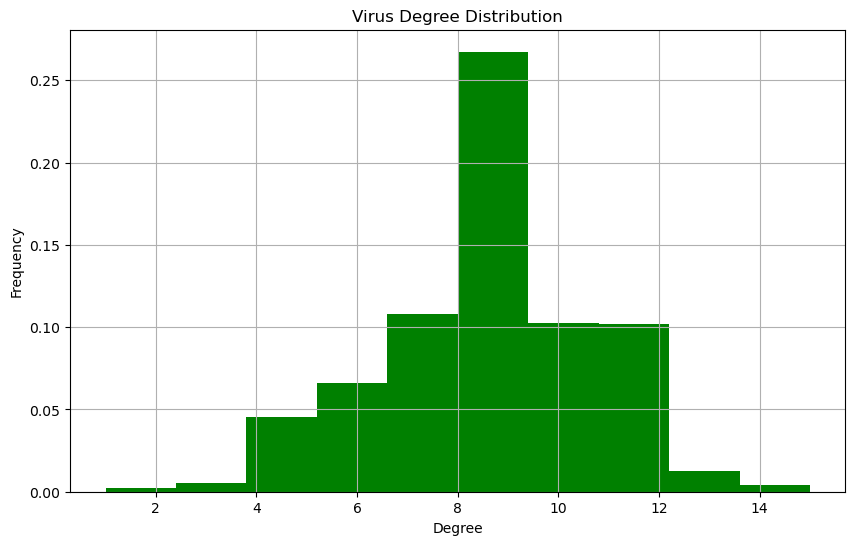

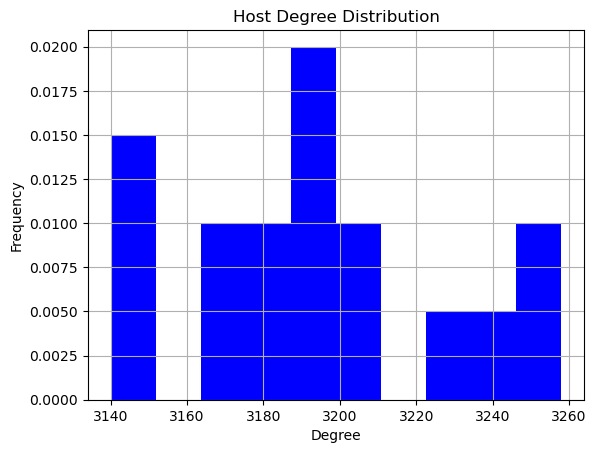

In [ ]:
aug4_er = ER(len(aug4.unique_viruses), len(aug4.unique_hosts), 0.5)
aug4_er.fill_ER_graph()
aug4_er.create_edge_list()

aug4_er_graph = Graph(aug4_er.matrix_rand, aug4.unique_viruses, aug4.unique_hosts)
aug4_er_graph.degree_distribution(aug4_er.calculate_degree())


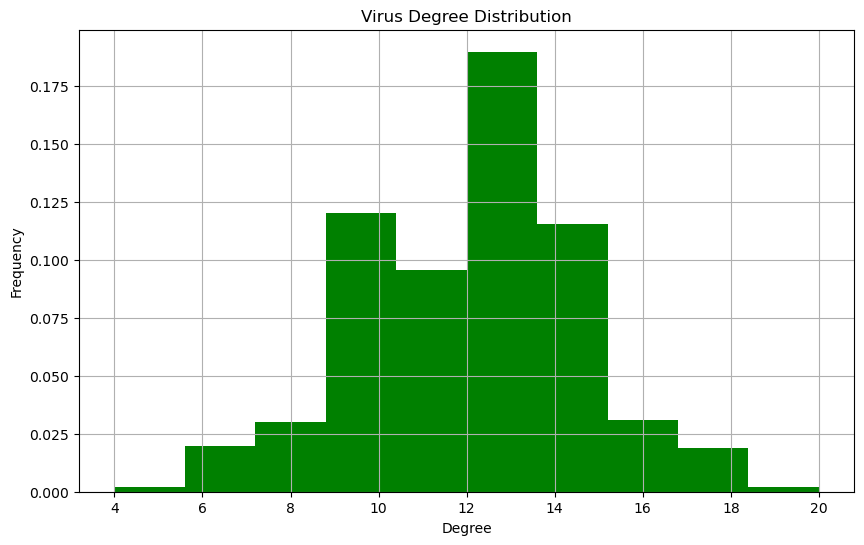

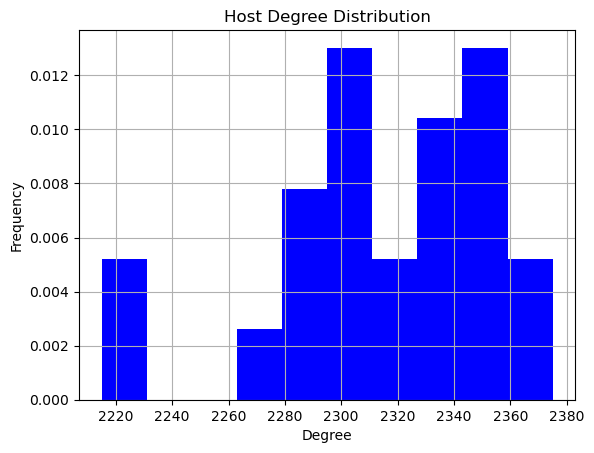

In [ ]:
sep29_er = ER(len(sep29.unique_viruses), len(sep29.unique_hosts), 0.5)
sep29_er.fill_ER_graph()
sep29_er.create_edge_list()

sep29_er_graph = Graph(sep29_er.matrix_rand, sep29.unique_viruses, sep29.unique_hosts)
sep29_er_graph.degree_distribution(sep29_er.calculate_degree())

Swapping edges: 100%|██████████| 10000000/10000000 [02:14<00:00, 74209.30it/s]


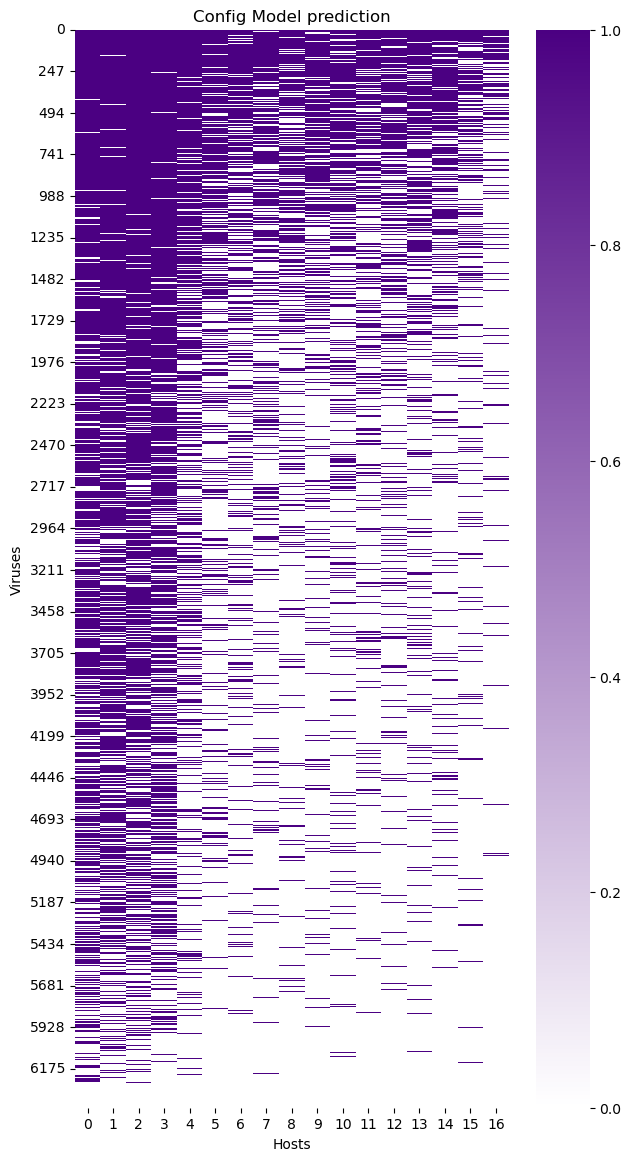

Calculating nestedness:  53%|█████▎    | 10967942/20528164 [09:44<08:23, 19001.11it/s]Process SpawnPoolWorker-8:
Process SpawnPoolWorker-14:
Process SpawnPoolWorker-9:
Process SpawnPoolWorker-10:
Process SpawnPoolWorker-12:
Process SpawnPoolWorker-13:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-11:
Calculating nestedness:  53%|█████▎    | 10969645/20528164 [09:45<08:29, 18750.36it/s]
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.12/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 386, i

KeyboardInterrupt: 

In [ ]:
aug4_config = CM(aug4.virus_host_array)
aug4_config.bootstrap_stats(10000000)
aug4_degree_distribution = Graph(aug4_config.matrix_vhip, aug4.unique_viruses, aug4.unique_hosts)
#aug4_degree_distribution.degree_distribution(deg_seq)
aug4_degree_distribution.plot_heatmap()
# for i in range(len(aug4_config.matrix_vhip)):
#     # print sum of each row
#     print(sum(aug4_config.matrix_vhip[i]))

# calc_nested = Calculations(aug4.virus_host_array)
# print(calc_nested.run_parallel())

calc_nested_new = Calculations(aug4_config.matrix_vhip)
nodf = calc_nested_new.run_parallel(8)
print(nodf)


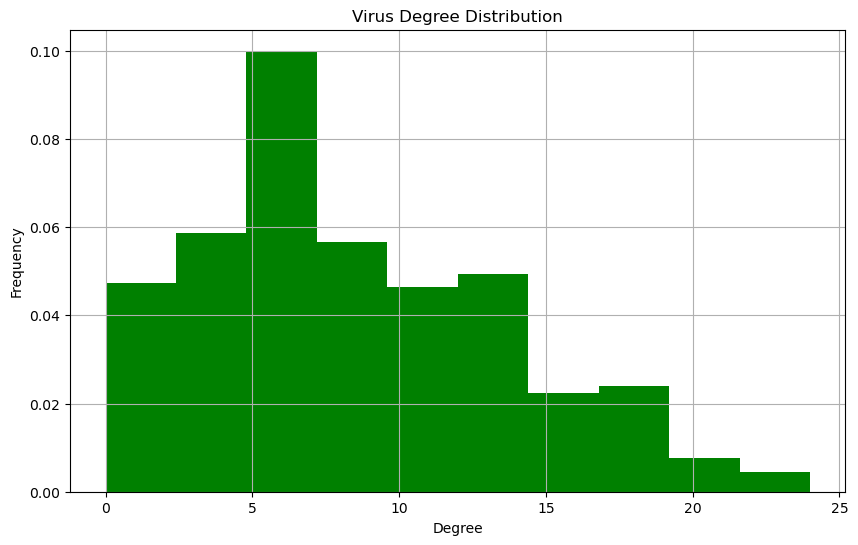

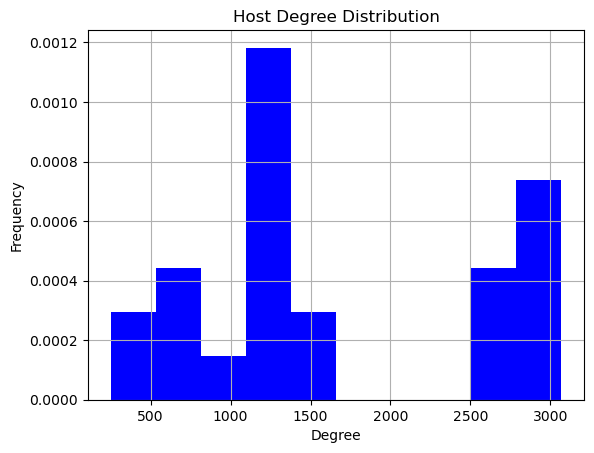

In [ ]:
sep29_config = CM(sep29.virus_host_array)
sep29_degree_distribution = Graph(sep29_config.matrix_vhip, sep29.unique_viruses, sep29.unique_hosts)
sep29_degree_distribution.degree_distribution(sep29_config.bootstrap_stats(1000))

### Centrality measurements for the Configuration Model

Swapping edges: 1478061it [00:20, 70405.74it/s]                            8.18it/s]


Successful runs:  1000000 Failed runs:  478061
eigen done


Swapping edges: 1476408it [00:20, 70634.78it/s]                            5.54it/s]


Successful runs:  1000000 Failed runs:  476408
eigen done


Swapping edges: 1476421it [00:21, 70004.70it/s]                            6.61it/s]


Successful runs:  1000000 Failed runs:  476421
eigen done


Swapping edges: 1475548it [00:20, 70468.48it/s]                            0.57it/s]


Successful runs:  1000000 Failed runs:  475548
eigen done


Swapping edges: 1475823it [00:20, 70637.88it/s]                            9.21it/s]


Successful runs:  1000000 Failed runs:  475823
eigen done


Swapping edges: 1478369it [00:20, 70933.51it/s]                            8.64it/s]


Successful runs:  1000000 Failed runs:  478369
eigen done


Swapping edges: 1477156it [00:20, 70800.66it/s]                            7.03it/s]


Successful runs:  1000000 Failed runs:  477156
eigen done


Swapping edges: 1475517it [00:20, 70597.98it/s]                            3.24it/s]


Successful runs:  1000000 Failed runs:  475517
eigen done


Swapping edges: 1477656it [00:20, 71017.25it/s]                            5.05it/s]


Successful runs:  1000000 Failed runs:  477656
eigen done


Swapping edges: 1476175it [00:20, 71028.50it/s]                            8.73it/s]


Successful runs:  1000000 Failed runs:  476175
eigen done


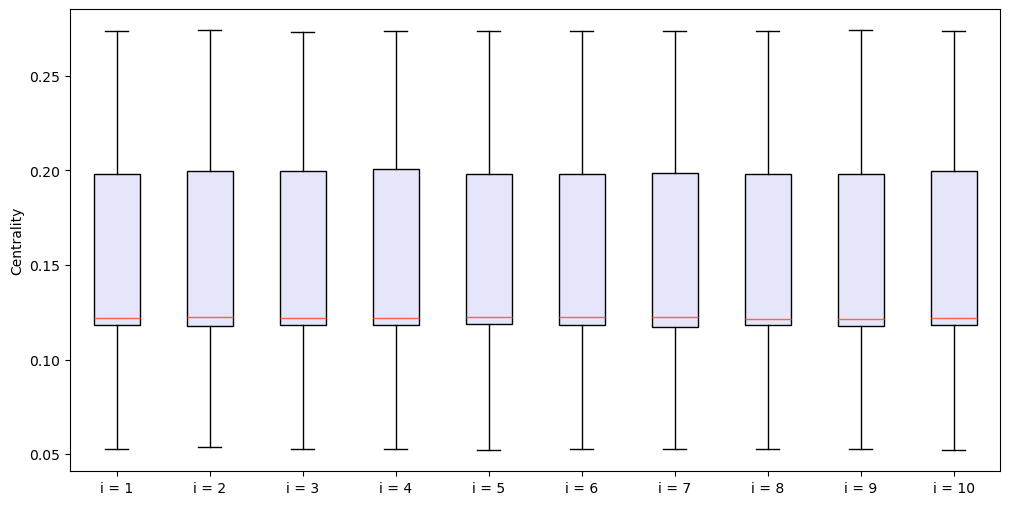

In [54]:
import matplotlib.pyplot as plt
import numpy as np

aug4_config = CM(aug4.virus_host_array)
centrality_virus = []
centrality_host = []
for i in range(10):
    # 10,000,000 swaps
    aug4_config.bootstrap_stats(1000000)
    aug4_closeness_plot = Graph(aug4_config.matrix_vhip, aug4.unique_viruses, aug4.unique_hosts)
    aug4_closeness_plot.initialize_graph()
    aug4_closeness_plot.calculate_centrality(1000, 'eigenvector')
    centrality_virus.append(aug4_closeness_plot.eigenvector_virus)
    centrality_host.append(aug4_closeness_plot.eigenvector_host)

# Make a boxplot for the eigenvector centrality for viruses
np.random.seed(19680801)
labels = ['i = 1', 'i = 2', 'i = 3', 'i = 4', 'i = 5', 'i = 6', 'i = 7', 'i = 8', 'i = 9', 'i = 10']
colors = ['lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender']

# Make the boxplot taller
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Centrality')

# Convert centrality_virus (list of dictionaries) to a list of lists
centrality_host_values = [list(d.values()) for d in centrality_host]
centrality_virus_values = [list(d.values()) for d in centrality_virus]

bplot = ax.boxplot(centrality_host_values,
                   patch_artist=True)  # fill with color

# change median line color
for median in bplot['medians']:
    median.set(color='tomato', linewidth=1)


# Set the x-tick labels
ax.set_xticklabels(labels)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


plt.show()



Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 53081.87it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:19<00:00, 52482.18it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 53114.58it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 54654.08it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 54333.67it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 54125.83it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 53300.90it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 52803.59it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 53268.05it/s]


eigen done


Swapping edges: 100%|██████████| 1000000/1000000 [00:18<00:00, 53539.82it/s]


eigen done


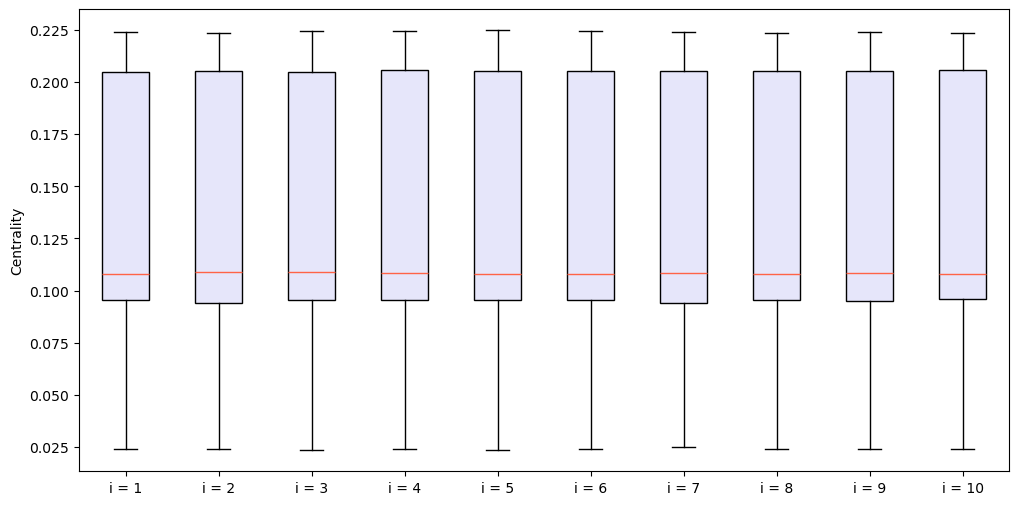

In [49]:
import matplotlib.pyplot as plt
import numpy as np

sep29_config = CM(sep29.virus_host_array)
centrality_virus = []
centrality_host = []
for i in range(10):
    # 10,000,000 swaps
    sep29_config.bootstrap_stats(1000000)
    sep29_closeness_plot = Graph(sep29_config.matrix_vhip, sep29.unique_viruses, sep29.unique_hosts)
    sep29_closeness_plot.initialize_graph()
    sep29_closeness_plot.calculate_centrality(1000, 'eigenvector')
    centrality_virus.append(sep29_closeness_plot.eigenvector_virus)
    centrality_host.append(sep29_closeness_plot.eigenvector_host)

# Make a boxplot for the eigenvector centrality for viruses
np.random.seed(19680801)
labels = ['i = 1', 'i = 2', 'i = 3', 'i = 4', 'i = 5', 'i = 6', 'i = 7', 'i = 8', 'i = 9', 'i = 10']
colors = ['lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender']

# Make the boxplot taller
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Centrality')

# Convert centrality_virus (list of dictionaries) to a list of lists
centrality_host_values = [list(d.values()) for d in centrality_host]
centrality_virus_values = [list(d.values()) for d in centrality_virus]

bplot = ax.boxplot(centrality_host_values,
                   patch_artist=True)  # fill with color

# change median line color
for median in bplot['medians']:
    median.set(color='tomato', linewidth=1)


# Set the x-tick labels
ax.set_xticklabels(labels)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


plt.show()

eigen done
closeness done
betweenness done


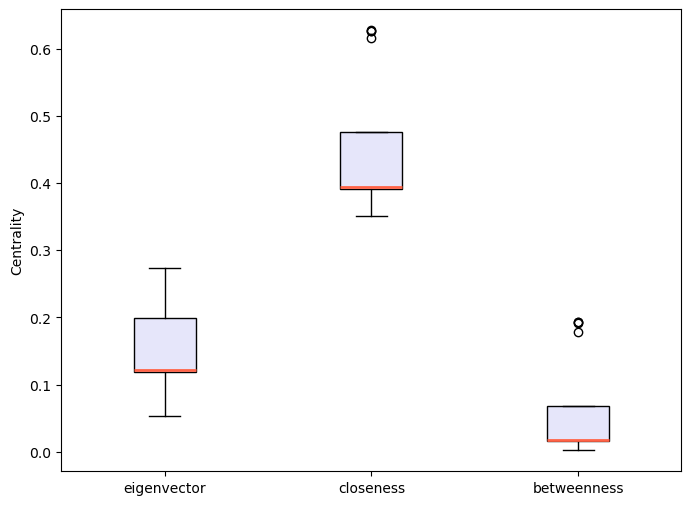

In [41]:
import matplotlib.pyplot as plt
import numpy as np

centrality_virus = []
centrality_host = []
aug4_plot = Graph(aug4.virus_host_array, aug4.unique_viruses, aug4.unique_hosts)
aug4_plot.initialize_graph()
aug4_plot.calculate_centrality(1000, 'eigenvector')
centrality_virus.append(aug4_plot.eigenvector_virus)
centrality_host.append(aug4_plot.eigenvector_host)
aug4_plot.calculate_centrality(1000, 'closeness')
centrality_virus.append(aug4_plot.closeness_virus)
centrality_host.append(aug4_plot.closeness_host)
aug4_plot.calculate_centrality(1000, 'betweenness')
centrality_virus.append(aug4_plot.betweenness_virus)
centrality_host.append(aug4_plot.betweenness_host)

# Make a boxplot for the eigenvector centrality for viruses
np.random.seed(19680801)
labels = ['eigenvector', 'closeness', 'betweenness']
colors = ['lavender', 'lavender', 'lavender']

# Make the boxplot taller
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel('Centrality')

# Convert centrality_virus (list of dictionaries) to a list of lists
centrality_host_values = [list(d.values()) for d in centrality_host]
centrality_virus_values = [list(d.values()) for d in centrality_virus]

bplot = ax.boxplot(centrality_host_values,
                   patch_artist=True)  # fill with color

# change median line color
for median in bplot['medians']:
    median.set(color='tomato', linewidth=2)

# Set the x-tick labels
ax.set_xticklabels(labels)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


plt.show()

Swapping edges: 100%|██████████| 1000/1000 [00:00<00:00, 58520.82it/s]


betweenness done


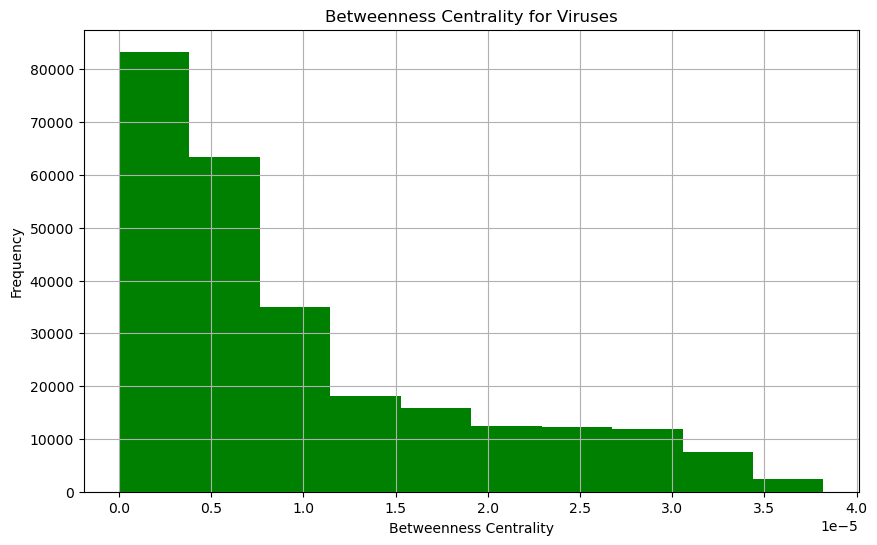

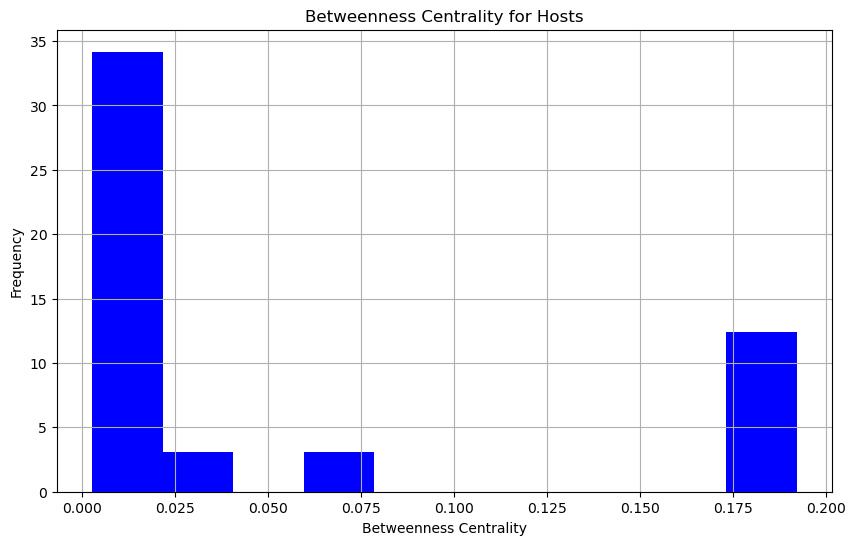

In [ ]:
aug4_config = CM(aug4.virus_host_array)
aug4_config.bootstrap_stats(1000)
aug4_betweenness_plot = Graph(aug4_config.matrix_vhip, aug4.unique_viruses, aug4.unique_hosts)
aug4_betweenness_plot.initialize_graph()
aug4_betweenness_plot.calculate_centrality(1000, 'betweenness')
aug4_betweenness_plot.plot_betweenness()

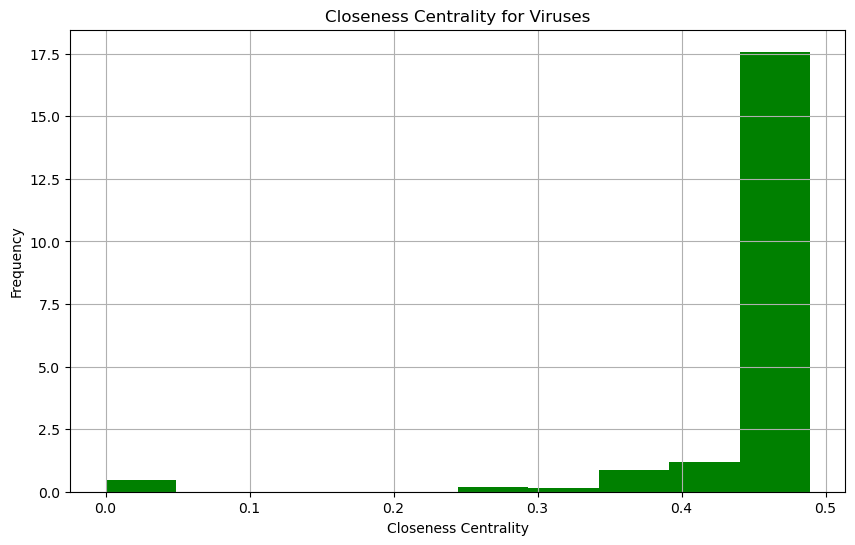

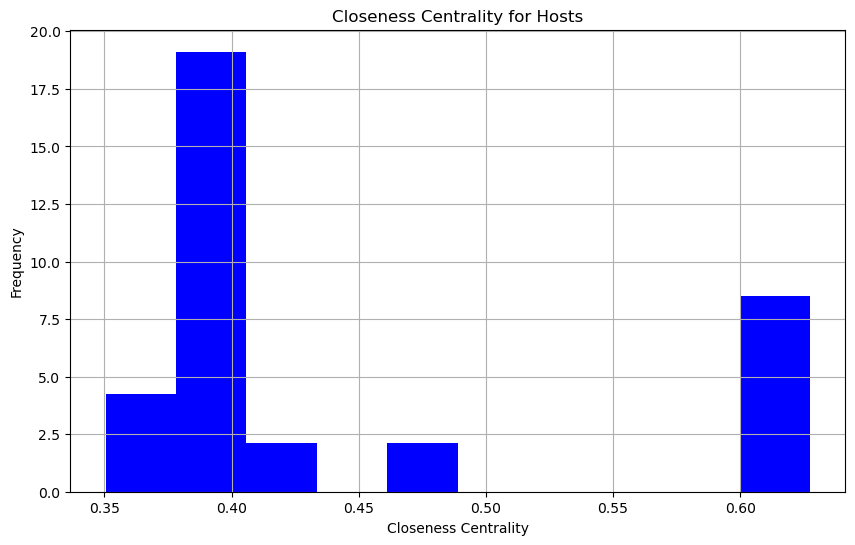

In [ ]:
aug4_config = CM(aug4.virus_host_array)
aug4_config.bootstrap_stats(1000)
aug4_closeness_plot = Graph(aug4_config.matrix_vhip, aug4.unique_viruses, aug4.unique_hosts)
aug4_closeness_plot.initialize_graph()
aug4_closeness_plot.calculate_centrality(1000, 'closeness')
aug4_closeness_plot.plot_closeness()

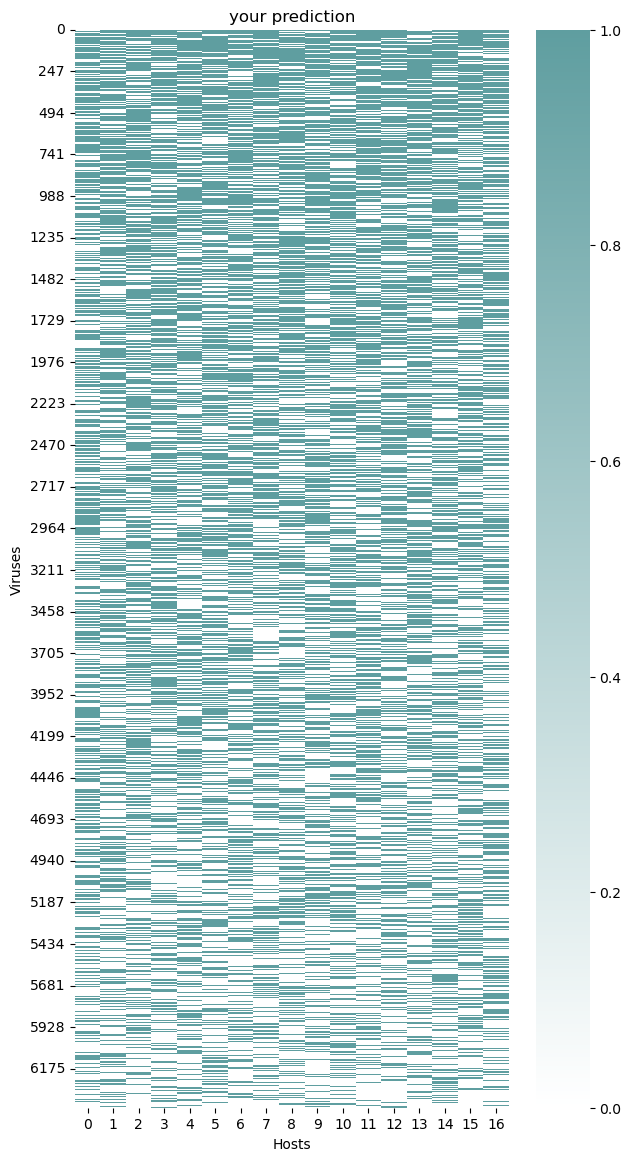

In [ ]:
aug4_er = ER(len(aug4.unique_viruses), len(aug4.unique_hosts), 0.5)
aug4_er.fill_ER_graph()
aug4_er.create_edge_list()
aug4_er.plot_heatmap('prediction')

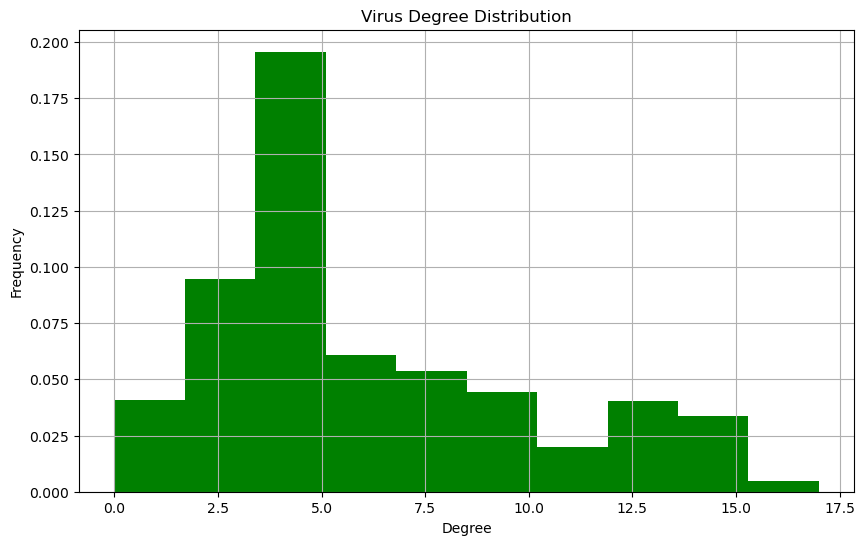

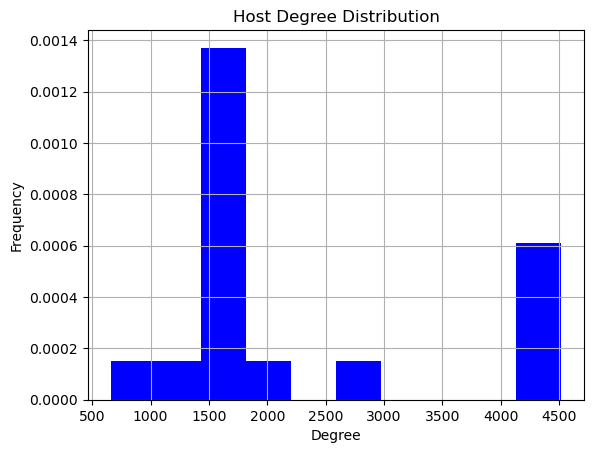

In [ ]:
# Centrality measurements for actual data
from VirusHostNetworkAnalysis.prediction_matrix import Calculations

aug4_graph = Graph(aug4.virus_host_array, aug4.unique_viruses, aug4.unique_hosts)
aug4_cal = Calculations(aug4.virus_host_array, True)
aug4_graph.degree_distribution(aug4_cal.calculate_degree())
print(min(aug4_cal.calculate_degree()))

In [ ]:
aug4_graph.initialize_graph()
aug4_graph.calculate_centrality(1000, 'eigenvector')
aug4_graph.calculate_centrality(1000, 'betweenness')
aug4_graph.calculate_centrality(1000, 'closeness')

eigen done
betweenness done
closeness done


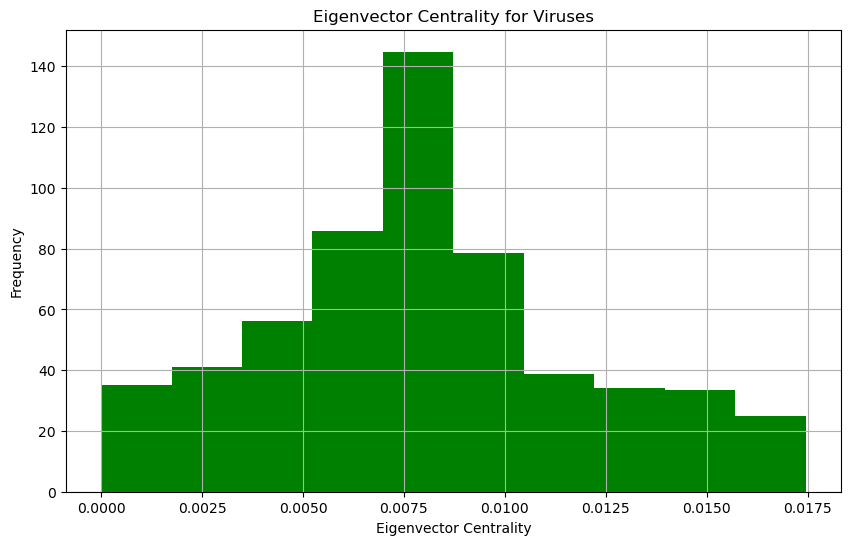

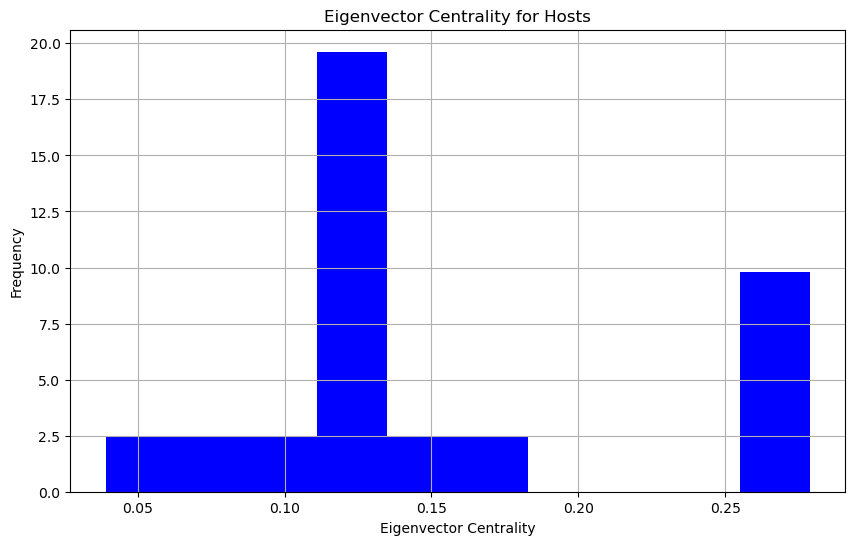

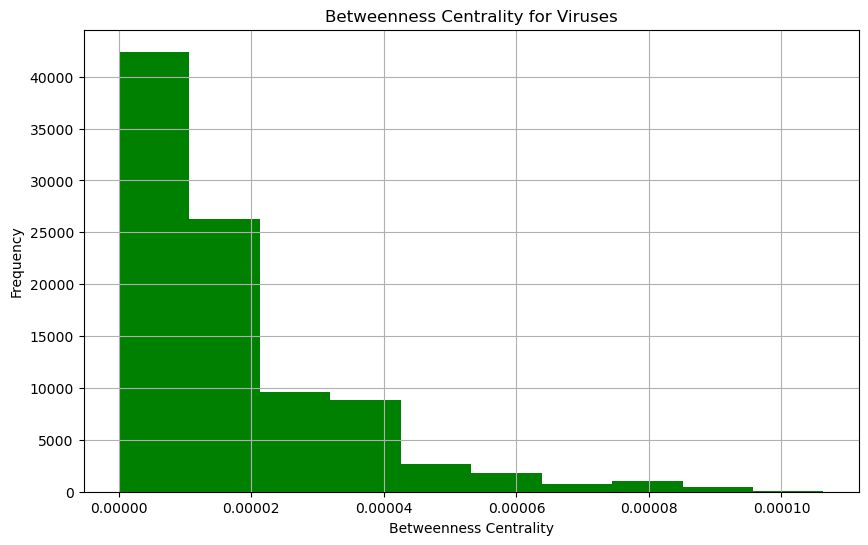

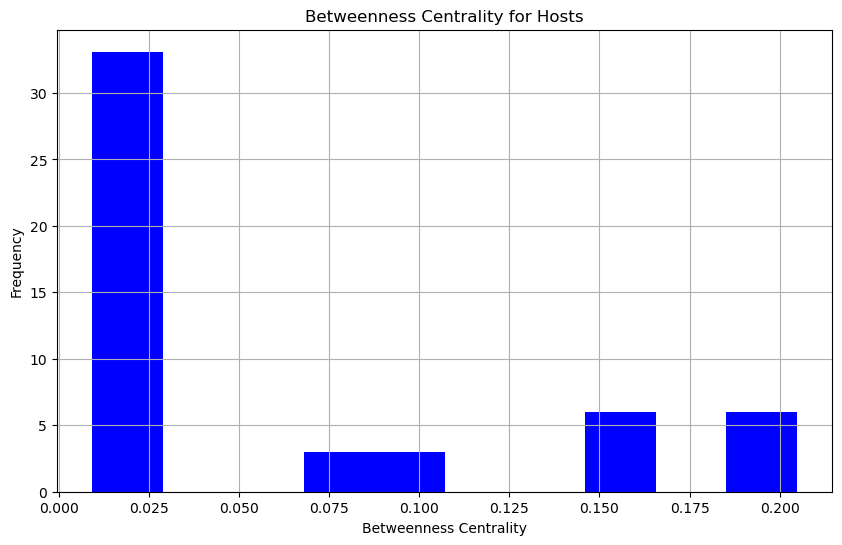

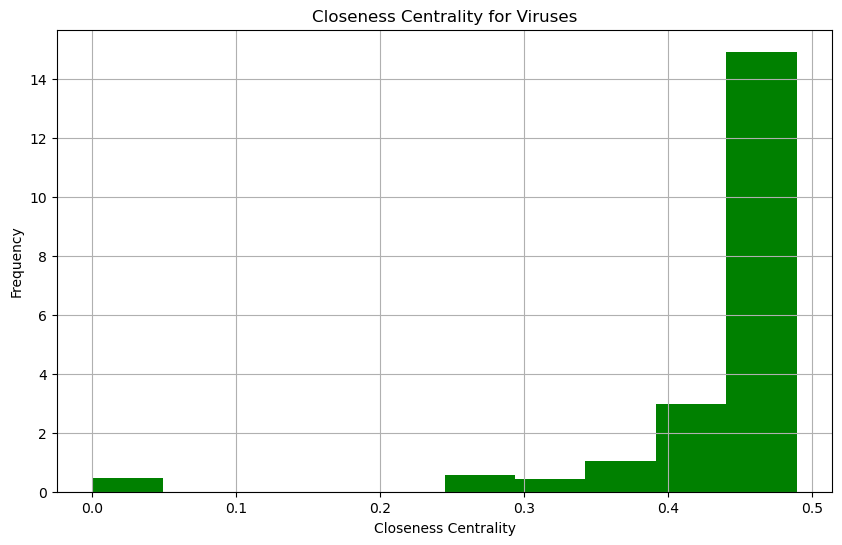

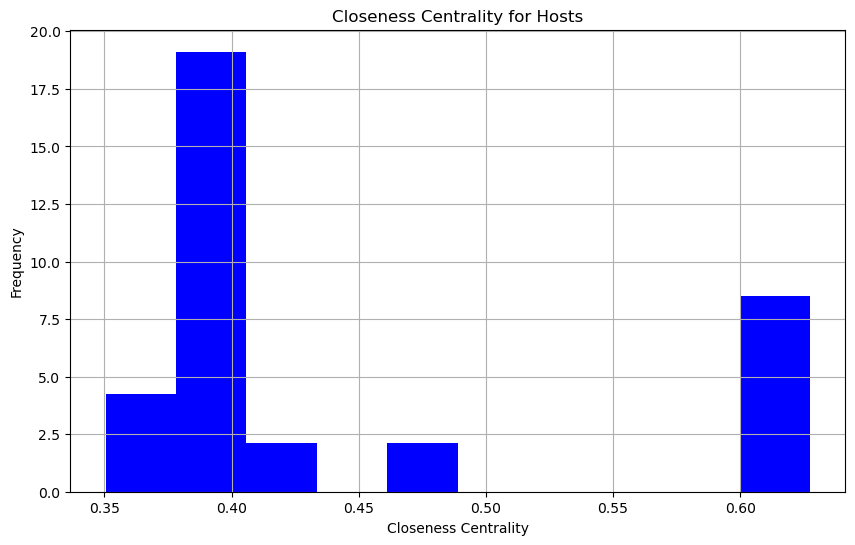

In [ ]:
aug4_graph.plot_eigenvectors()
aug4_graph.plot_betweenness()
aug4_graph.plot_closeness()

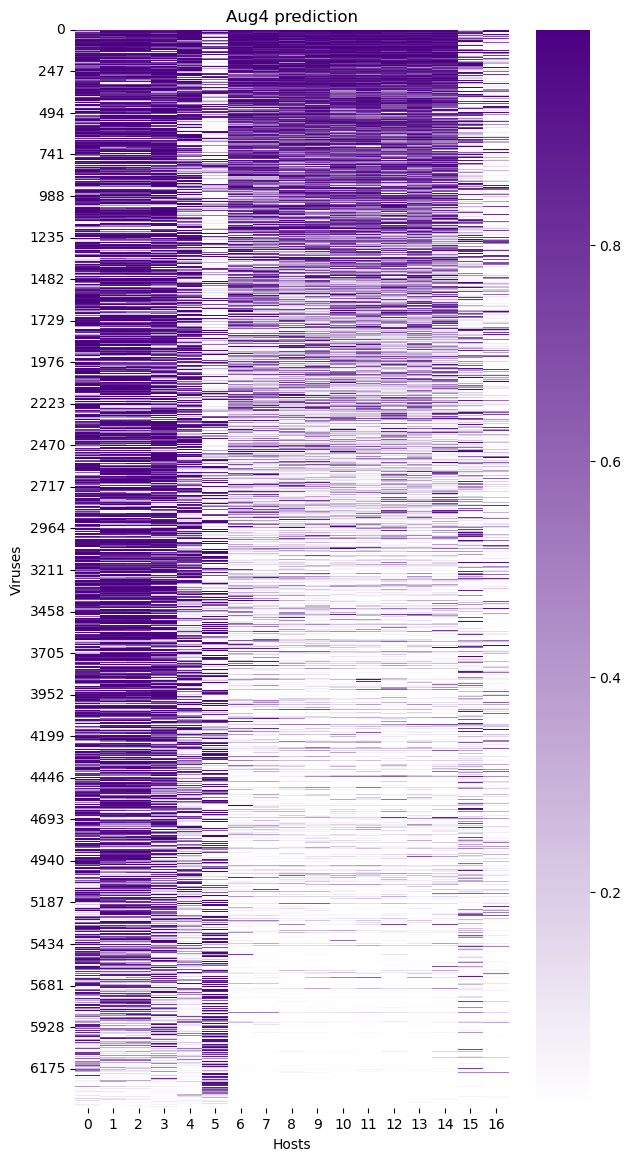

In [ ]:
aug4.plot_heatmap('prediction')

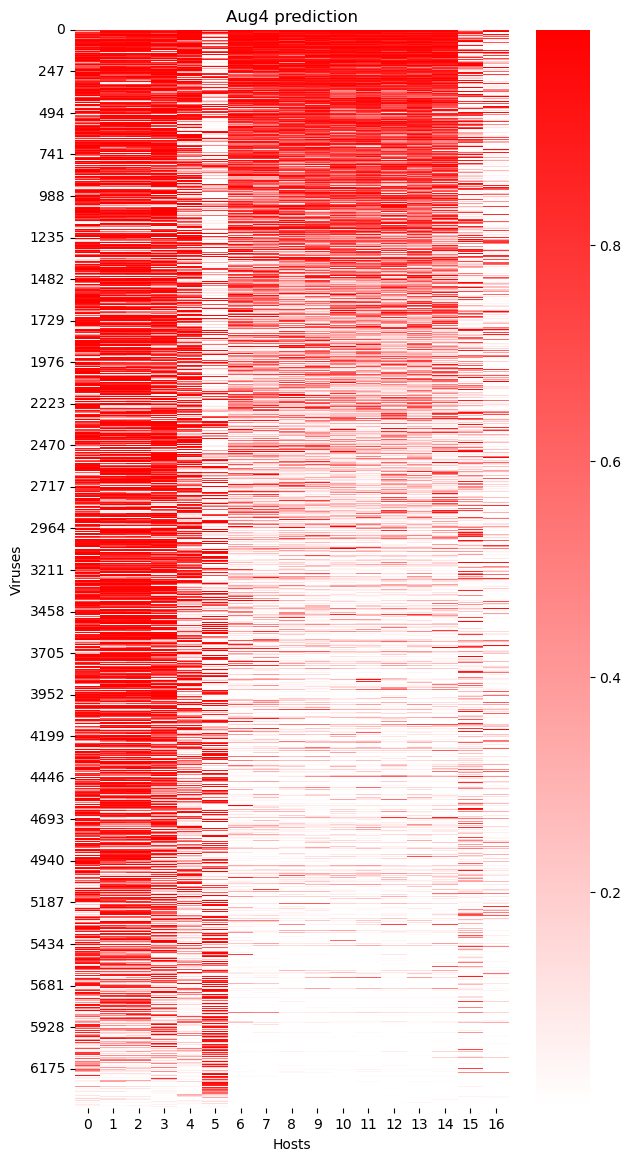

In [ ]:
aug4.plot_heatmap('prediction', prediction_color= 'red')

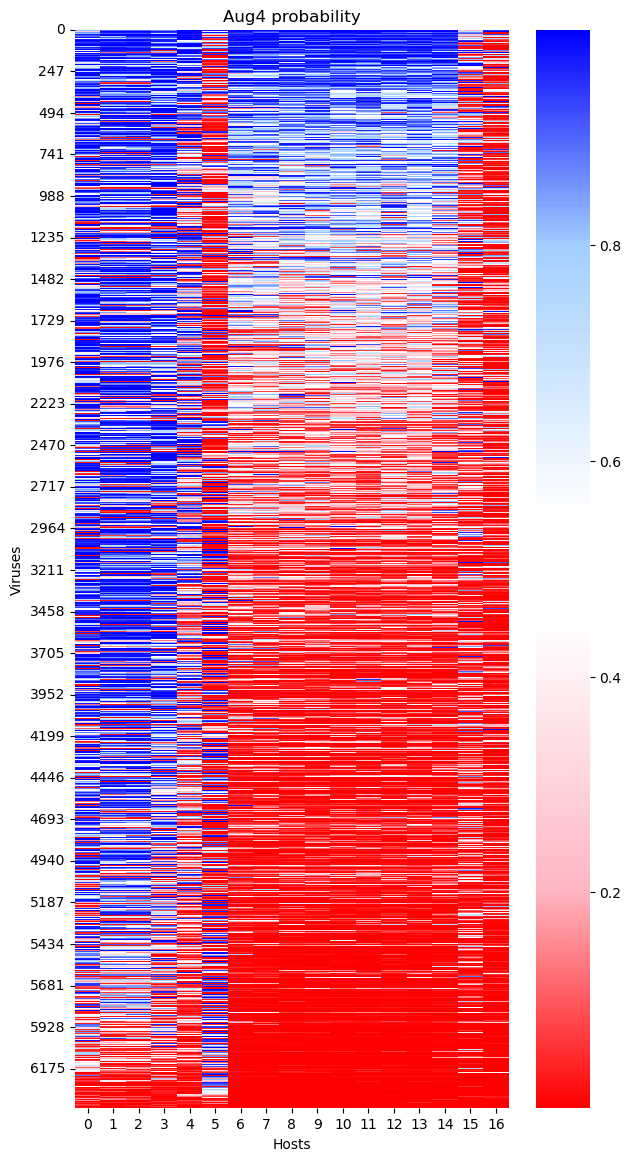

In [ ]:
aug4.plot_heatmap('probability')

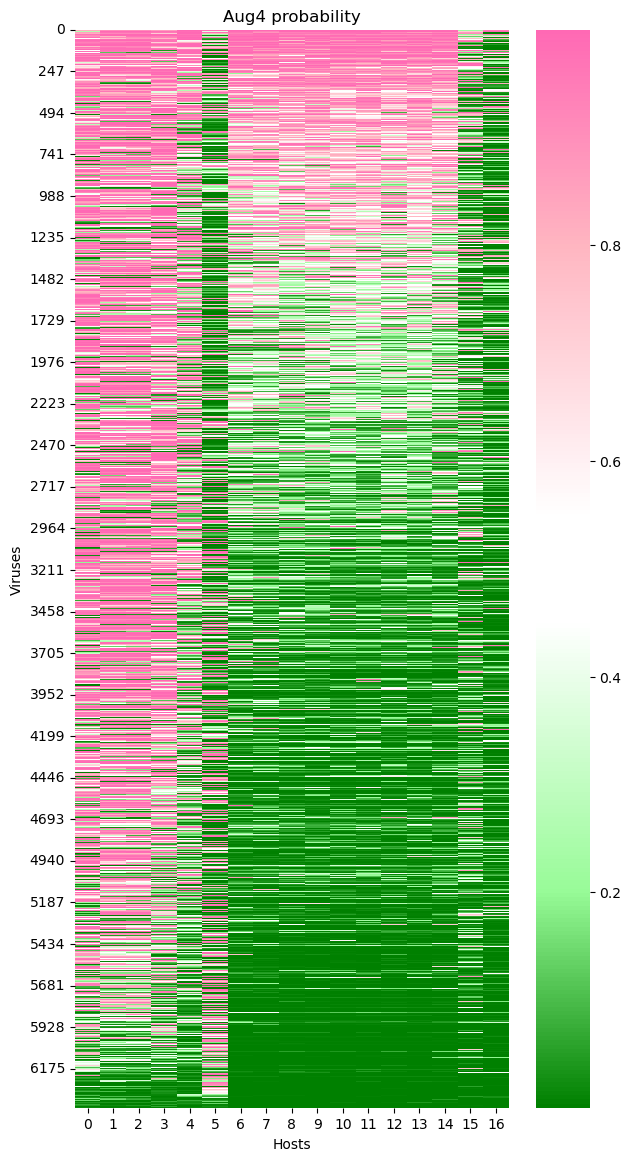

In [ ]:
aug4.plot_heatmap('probability', color_map = ["green", "palegreen", "white", "lightpink", "hotpink"])